# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [2]:
import requests
from bs4 import BeautifulSoup as bs
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 30.96, 即時現金賣出: 31.63


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [22]:
'''

  Your code here
  
'''
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
rs = requests.Session()
rs.encoding = 'utf-8'
r = rs.get(url)

html = bs(r.text, 'lxml')
data = html.find('table').find('tbody').find_all('tr')
for i in data:
    currency = i.find('div',attrs={'class':'visible-phone print_hide'}).text.replace(' ','')
    buy = i.find('td',attrs={'class':'rate-content-cash text-right print_hide','data-table':"本行現金買入"})
    sell = i.find('td',attrs={'class':'rate-content-cash text-right print_hide','data-table':"本行現金賣出"})
    print('-'*50)
    print(currency)
    print('本行現金買入：',buy.text)
    print('本行現金賣出：',sell.text)




--------------------------------------------------

美金(USD)

本行現金買入： 28.72
本行現金賣出： 29.39
--------------------------------------------------

港幣(HKD)

本行現金買入： 3.601
本行現金賣出： 3.805
--------------------------------------------------

英鎊(GBP)

本行現金買入： 36.35
本行現金賣出： 38.47
--------------------------------------------------

澳幣(AUD)

本行現金買入： 20.83
本行現金賣出： 21.61
--------------------------------------------------

加拿大幣(CAD)

本行現金買入： 21.53
本行現金賣出： 22.44
--------------------------------------------------

新加坡幣(SGD)

本行現金買入： 20.89
本行現金賣出： 21.8
--------------------------------------------------

瑞士法郎(CHF)

本行現金買入： 31.16
本行現金賣出： 32.36
--------------------------------------------------

日圓(JPY)

本行現金買入： 0.2702
本行現金賣出： 0.283
--------------------------------------------------

南非幣(ZAR)

本行現金買入： -
本行現金賣出： -
--------------------------------------------------

瑞典幣(SEK)

本行現金買入： 2.93
本行現金賣出： 3.45
--------------------------------------------------

紐元(NZD)

本行現金買入： 19.15
本行現金賣出： 20
--------------------------

## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

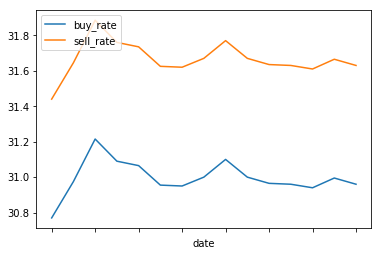

In [4]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2019-08")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

USD


<Figure size 720x576 with 0 Axes>

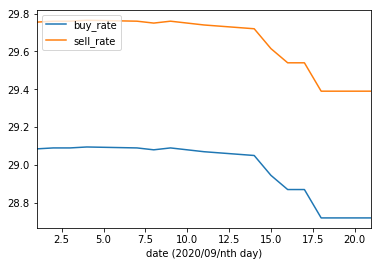

HKD


<Figure size 720x576 with 0 Axes>

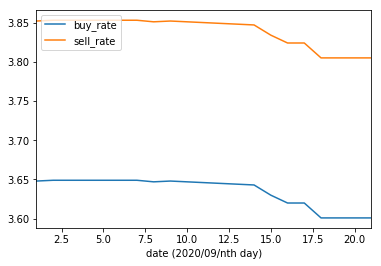

GBP


<Figure size 720x576 with 0 Axes>

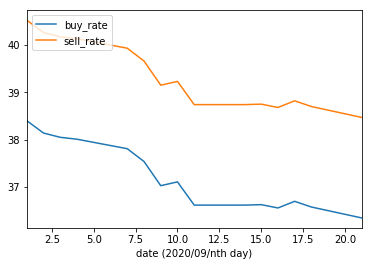

AUD


<Figure size 720x576 with 0 Axes>

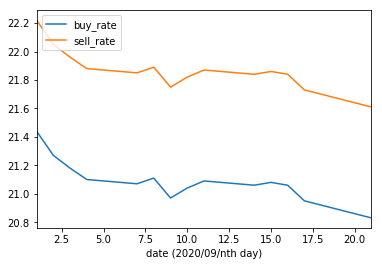

CAD


<Figure size 720x576 with 0 Axes>

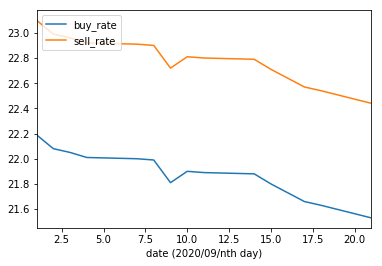

SGD


<Figure size 720x576 with 0 Axes>

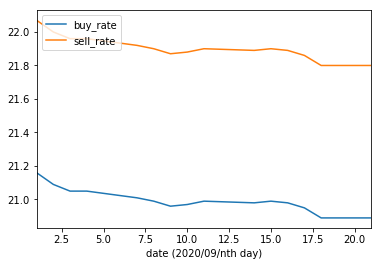

CHF


<Figure size 720x576 with 0 Axes>

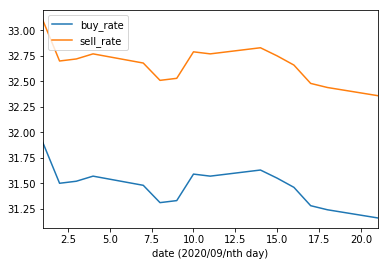

JPY


<Figure size 720x576 with 0 Axes>

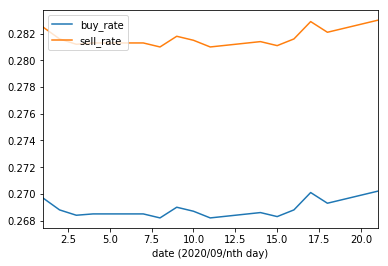

ZAR


<Figure size 720x576 with 0 Axes>

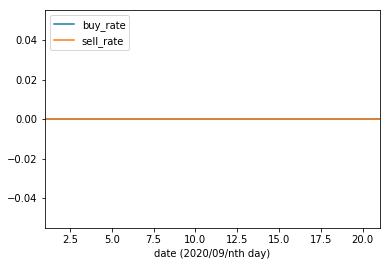

SEK


<Figure size 720x576 with 0 Axes>

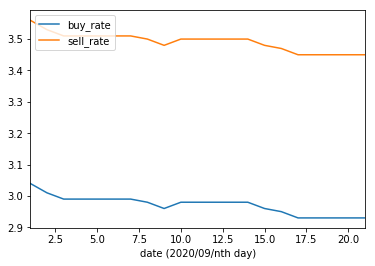

NZD


<Figure size 720x576 with 0 Axes>

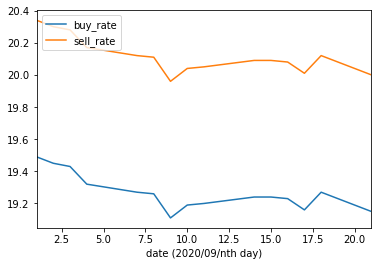

THB


<Figure size 720x576 with 0 Axes>

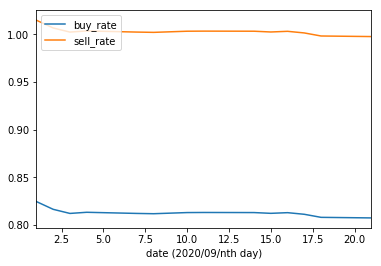

PHP


<Figure size 720x576 with 0 Axes>

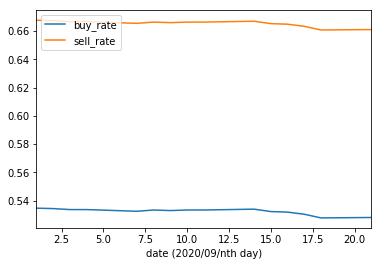

IDR


<Figure size 720x576 with 0 Axes>

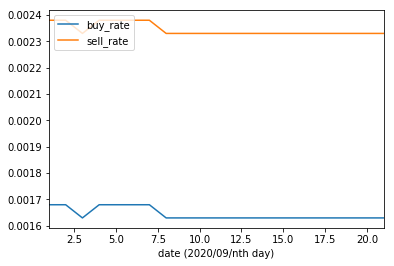

EUR


<Figure size 720x576 with 0 Axes>

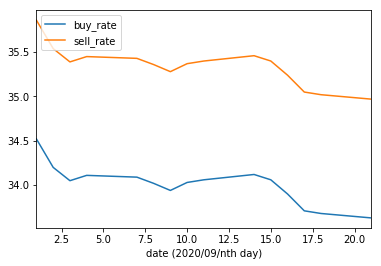

KRW


<Figure size 720x576 with 0 Axes>

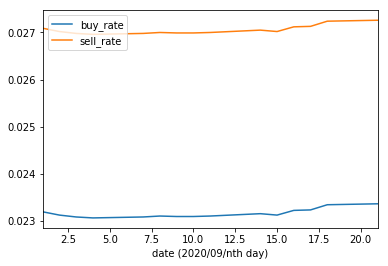

VND


<Figure size 720x576 with 0 Axes>

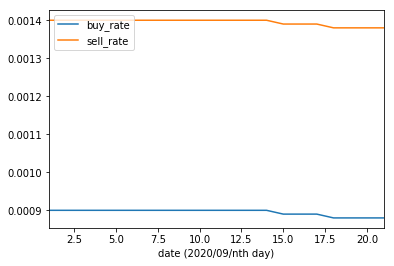

MYR


<Figure size 720x576 with 0 Axes>

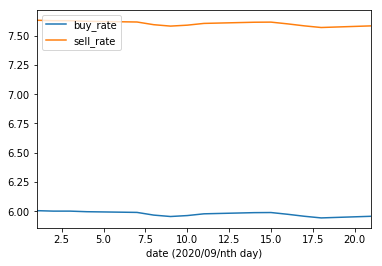

CNY


<Figure size 720x576 with 0 Axes>

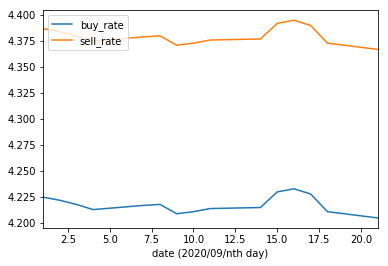

In [38]:
'''

  Your code here

'''
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
baseurl = 'https://rate.bot.com.tw' + '/xrt/quote/' + '2020-09/'
rs = requests.Session()
rs.encoding = 'utf-8'
r = rs.get(url)

html = bs(r.text, 'lxml')
data = html.find('table').find('tbody').find_all('tr')
for i in data:
    # Get the URL of history rate.
    historyurl = baseurl +  i.find('td', attrs={'data-table':"歷史匯率"}).find('a')['href'][-3:]
    r = rs.get(historyurl)
    soup = bs(r.text,'lxml')
    lines = soup.find('table').find('tbody').find_all('tr')
    

    ## Get data for plotting
    buy = []
    sell = []
    day = []
    for j in lines:
        moneys = j.find_all('td',attrs={'class':'rate-content-cash text-right print_table-cell'})
        date = j.find('td',attrs={'class':'text-center'})
        
        buy.append(float(moneys[0].text))
        sell.append(float(moneys[1].text))
        day.append(int(date.text[-2:]))

    # 將匯率資料建成dataframe形式
    HistoryExchangeRate = pd.DataFrame({'date (2020/09/nth day)': day,
                                        'buy_rate':buy,
                                        'sell_rate':sell})

    HistoryExchangeRate = HistoryExchangeRate.set_index('date (2020/09/nth day)')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

    # 畫出歷史匯率軌跡圖
    print(historyurl[-3:])
    plt.figure(figsize=(10, 8))
    HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
    plt.show()

